In [0]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

In [0]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [6]:
# Getting the data (Class Imbalanced Dataset)
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/FraudDetect.csv')
print("\nClass Imbalance :")
print(f"Total Legit Transactions = {dataset['Class'].value_counts()[0]}")
print(f"Total Fraud Transactions = {dataset['Class'].value_counts()[1]}")
print("\nDataset Description : \n", dataset.describe())



Class Imbalance :
Total Legit Transactions = 284315
Total Fraud Transactions = 492

Dataset Description : 
                 Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


Text(0.5, 1.0, 'Heatmap of Correlation : Imbalanced Dataset')

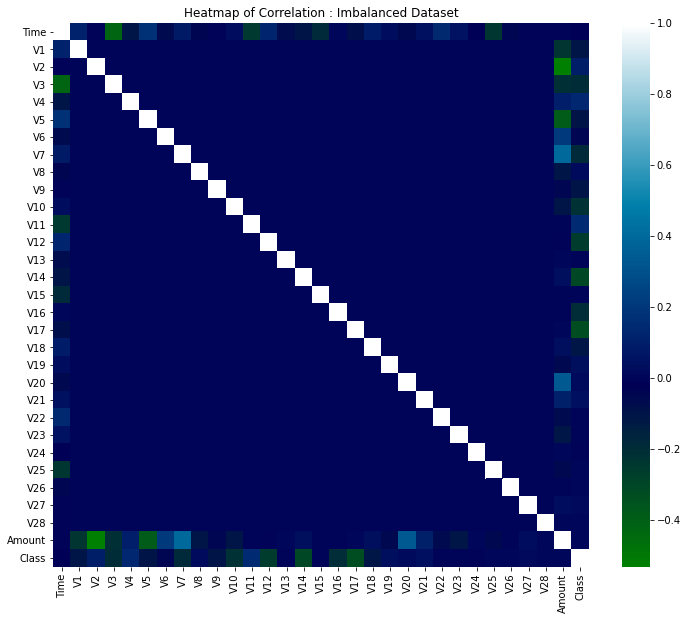

In [7]:
# Correlation Plot of the Imbalanced Dataset
corrmatx = dataset.corr()
plt.figure(figsize = (12, 10))
heat = sns.heatmap(data = corrmatx, cmap = 'ocean')
plt.title("Heatmap of Correlation : Imbalanced Dataset")

In [9]:
# Split the imbalanced dataset into training and test datasets
data_train, data_test = train_test_split(dataset, test_size = 0.1, random_state = 1)
print(f"Shape of Train set : {data_train.shape}")
print(f"Shape of Test set : {data_test.shape}")

Shape of Train set : (256326, 31)
Shape of Test set : (28481, 31)


In [13]:
# Class Distribution in the Imbalanced Dataset
train_legit = dataset[dataset['Class'] == 0]
train_fraud = dataset[dataset['Class'] == 1]
print(f"Legit Train Transactions = {len(train_legit)}")
print(f"Fraud Train Transactions = {len(train_fraud)}")

Legit Train Transactions = 284315
Fraud Train Transactions = 492


In [0]:
# Subsampling to create a balanced dataset
train_legit = train_legit.sample(len(train_fraud))
train_resampled = pd.concat([train_fraud, train_legit])
train_resampled = train_resampled.sample(frac = 1).reset_index(drop = True)

Text(0.5, 1.0, 'Heatmap of Correlation - Balanced Dataset')

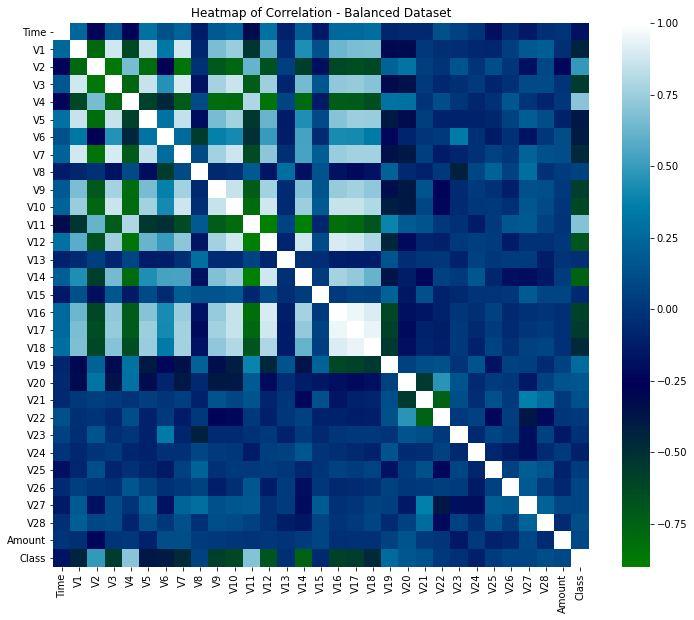

In [15]:
# Correlation Matrix of Balanced Dataset
corrmatx = train_resampled.corr()
plt.figure(figsize = (12, 10))
heat = sns.heatmap(data = corrmatx, cmap = 'ocean')
plt.title("Heatmap of Correlation - Balanced Dataset")

In [17]:
# Feature Selection : identifying the features with a strong correlation (above 0.5)
corrmatx[abs(corrmatx['Class']) > 0.5]['Class']

V3      -0.562921
V4       0.708825
V9      -0.573357
V10     -0.618980
V11      0.691744
V12     -0.682982
V14     -0.752010
V16     -0.591560
V17     -0.561562
Class    1.000000
Name: Class, dtype: float64

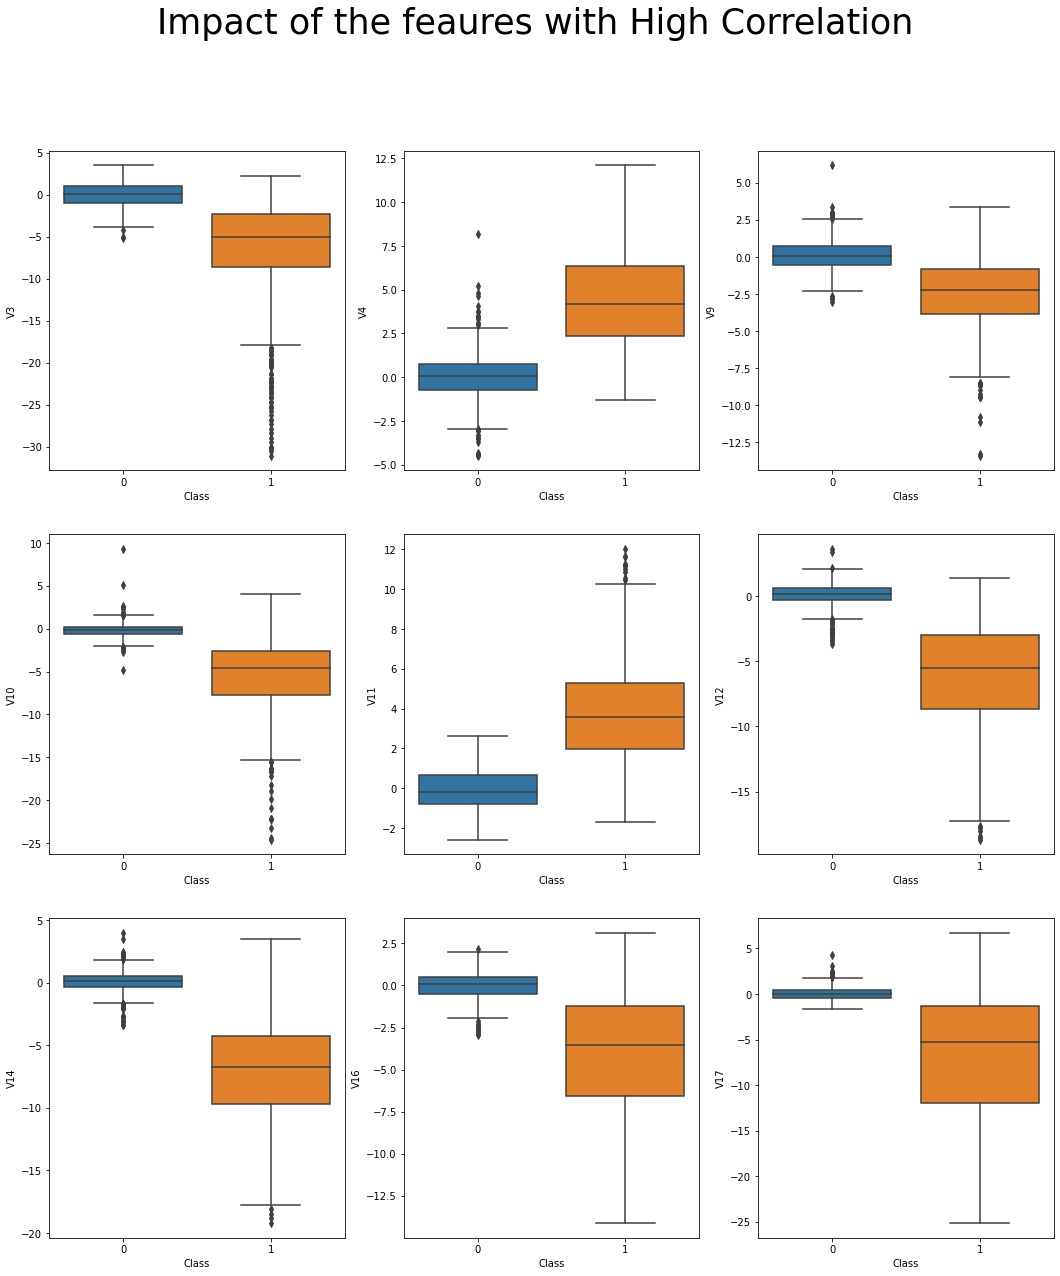

In [18]:
# Visualizing the impact of selected features
f, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (18, 20))
f.suptitle('Impact of the feaures with High Correlation', size = 35)
sns.boxplot(x = "Class", y = "V3", data = train_resampled, ax = axes[0, 0])
sns.boxplot(x = "Class", y = "V4", data = train_resampled, ax = axes[0, 1])
sns.boxplot(x = "Class", y = "V9", data = train_resampled, ax = axes[0, 2])
sns.boxplot(x = "Class", y = "V10", data = train_resampled, ax = axes[1, 0])
sns.boxplot(x = "Class", y = "V11", data = train_resampled, ax = axes[1, 1])
sns.boxplot(x = "Class", y = "V12", data = train_resampled, ax = axes[1, 2])
sns.boxplot(x = "Class", y = "V14", data = train_resampled, ax = axes[2, 0])
sns.boxplot(x = "Class", y = "V16", data = train_resampled, ax = axes[2, 1])
sns.boxplot(x = "Class", y = "V17", data = train_resampled, ax = axes[2, 2])

In [0]:
# Outlier Detection and Removal using Quartile Range
Q1 = train_resampled.quantile(0.25)
Q3 = train_resampled.quantile(0.75)
IQR = Q3 - Q1
resampled_data = train_resampled[~((train_resampled < (Q1 - 2.5 * IQR)) | (train_resampled > (Q3 + 2.5 * IQR))).any(axis = 1)]

In [29]:
len(resampled_data)

702

In [0]:
# Splitting the resampled data into training and test sets
X = resampled_data.iloc[:, :-1].values
y = resampled_data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

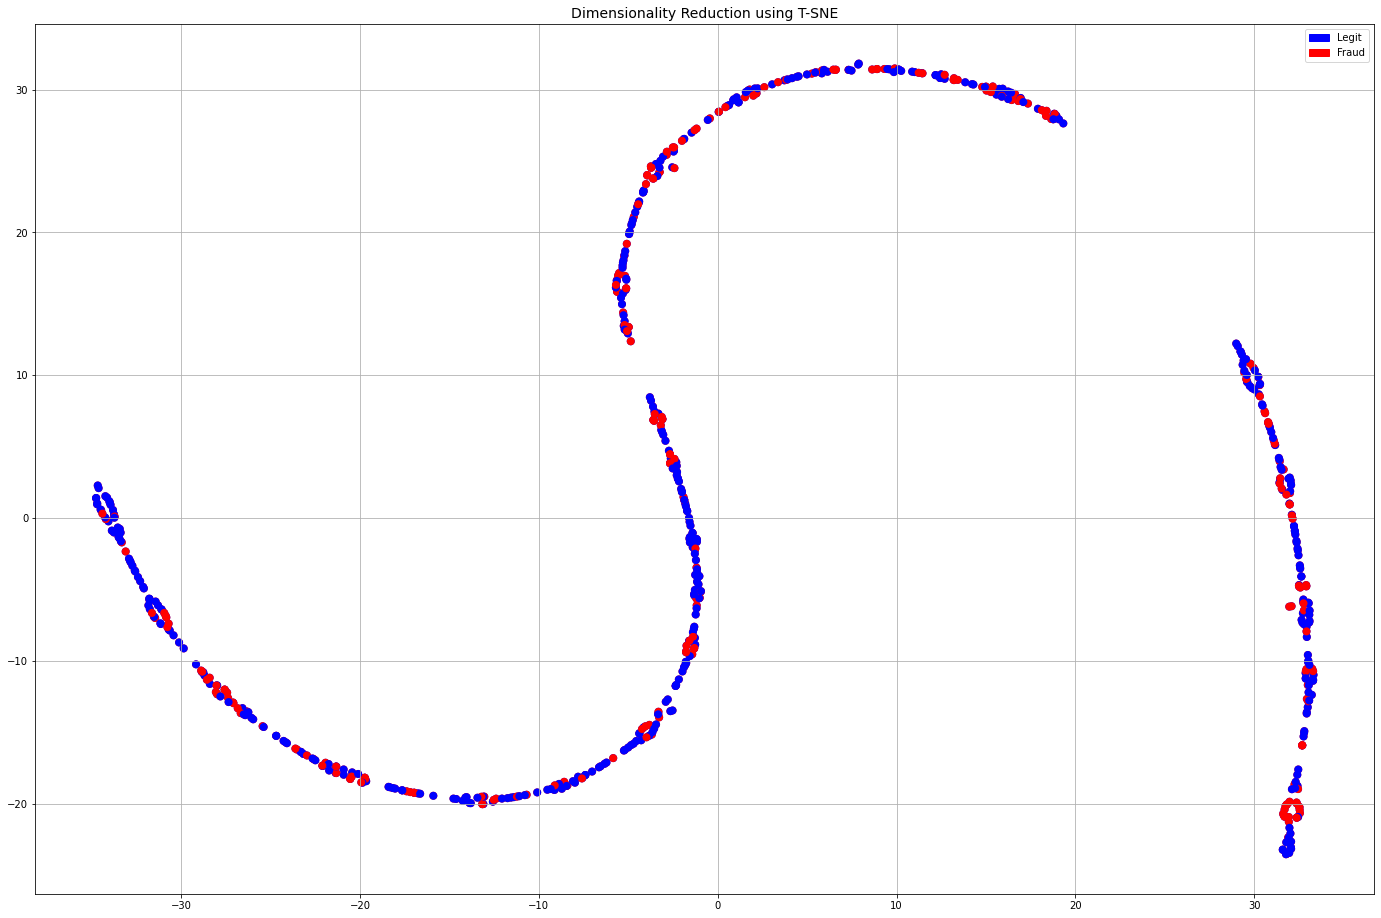

In [37]:
# Dimensionality Reduction and Visualization
X_tsne = TSNE(n_components = 2, random_state = 1).fit_transform(X)
f, ax = plt.subplots(figsize = (24, 16))
bluedots = mpatches.Patch(color = '#0000FF', label = 'Legit')
reddots = mpatches.Patch(color = '#FF0000', label = 'Fraud')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c = (y == 0), cmap = 'bwr', label = 'Legit', linewidths = 2)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c = (y == 1), cmap = 'bwr', label = 'Fraud', linewidths = 2)
ax.set_title('Dimensionality Reduction using T-SNE', fontsize = 14 )
ax.grid(True)
ax.legend(handles= [bluedots, reddots])

In [38]:
# K-Fold Cross Validation
rfc = RandomForestClassifier()
kfold = KFold(n_splits = 10)
cv_results = cross_val_score(rfc, X_train, y_train, cv = kfold, scoring = 'roc_auc')
print(f"Mean accuracy is {cv_results.mean()} and Standard Deviation is {cv_results.std()}") 

Mean accuracy is 0.9616508723285999 and Standard Deviation is 0.02829694127488993


In [39]:
# Training the model and predicting
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Accuracy Score : \n", accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))

Confusion Matrix : 
 [[87  4]
 [ 5 45]]
Accuracy Score : 
 0.9361702127659575
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        91
           1       0.92      0.90      0.91        50

    accuracy                           0.94       141
   macro avg       0.93      0.93      0.93       141
weighted avg       0.94      0.94      0.94       141

